<a href="https://colab.research.google.com/github/DevPrana/Profit_MLmodel/blob/main/City_Profit_Expenses_ACM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
data = pd.read_csv("https://raw.githubusercontent.com/DevPrana/Profit_MLmodel/main/ML%20Dataset.csv")

In [5]:
data.head()

,City,Social Media Expenses,Outdoor Ad Expenses,Print Media Expenses,Profit
0,Mumbai,136897.80,471784.10,165349.20,192261.83
1,Chandigarh,151377.59,443898.53,162597.70,191792.06
2,Delhi,101145.55,407934.54,153441.51,191050.39
3,Mumbai,118671.85,383199.62,144372.41,182901.99
4,Delhi,91391.77,366168.42,142107.34,166187.94


In [6]:
data.isnull().any()

City                     False
Social Media Expenses    False
Outdoor Ad Expenses      False
Print Media Expenses     False
Profit                   False
dtype: bool

In [8]:
data.shape

(50, 5)

In [20]:
data.describe()

,Social_Media_Expenses,Outdoor_Ad_Expenses,Print_Media_Expenses,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,121344.639600,211025.097800,73721.615600,112012.639200
std,28017.802755,122290.310726,45902.256482,40306.180338
min,51283.140000,0.000000,0.000000,14681.400000
25%,103730.875000,129300.132500,39936.370000,90138.902500
50%,122699.795000,212716.240000,73051.080000,107978.190000
75%,144842.180000,299469.085000,101602.800000,139765.977500
max,182645.560000,471784.100000,165349.200000,192261.830000


In [35]:
data[data.Outdoor_Ad_Expenses==0]
data[data.Print_Media_Expenses==0]
data[data.Profit==14681.400000]

,City,Social_Media_Expenses,Outdoor_Ad_Expenses,Print_Media_Expenses,Profit
49,Chandigarh,116983.8,45173.06,0.0,14681.4


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data[["Social_Media_Expenses","Outdoor_Ad_Expenses","Print_Media_Expenses","Profit"]].items():
  sns.boxplot(y=k, data=data[["Social_Media_Expenses","Outdoor_Ad_Expenses","Print_Media_Expenses","Profit"]], ax=axs[index])
  index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [17]:
for k, v in data.items():
  try:
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))
  except:pass

Column Social Media Expenses outliers = 0.00%
Column Outdoor Ad Expenses outliers = 0.00%
Column Print Media Expenses outliers = 0.00%
Column Profit outliers = 2.00%


In [38]:
data.corr()

,Social_Media_Expenses,Outdoor_Ad_Expenses,Print_Media_Expenses,Profit
Social_Media_Expenses,1.000000,-0.032154,0.241955,0.200717
Outdoor_Ad_Expenses,-0.032154,1.000000,0.724248,0.747766
Print_Media_Expenses,0.241955,0.724248,1.000000,0.972900
Profit,0.200717,0.747766,0.972900,1.000000


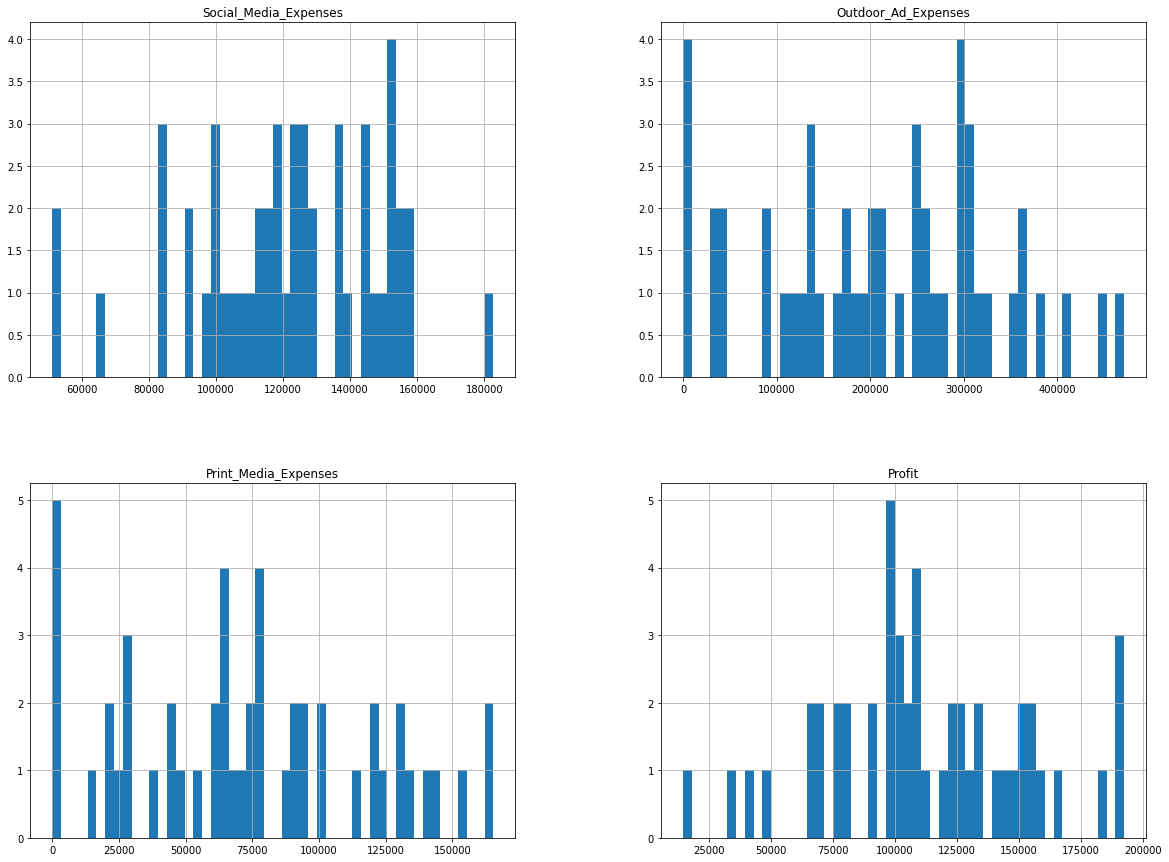

In [41]:
data.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
a=pd.get_dummies(data['City'],drop_first=True)
a

In [58]:
new_data=pd.concat([a,data],axis=1)
new_data.drop('City',inplace=True,axis=1)
new_data.head()

,Delhi,Mumbai,Social_Media_Expenses,Outdoor_Ad_Expenses,Print_Media_Expenses,Profit
0,0,1,136897.80,471784.10,165349.20,192261.83
1,0,0,151377.59,443898.53,162597.70,191792.06
2,1,0,101145.55,407934.54,153441.51,191050.39
3,0,1,118671.85,383199.62,144372.41,182901.99
4,1,0,91391.77,366168.42,142107.34,166187.94


In [ ]:
new_data.plot(kind='scatter',x='Social_Media_Expenses',y='Profit',alpha=1,figsize=(10,5),sharex=False)

In [ ]:
new_data.plot(kind='scatter',x='Outdoor_Ad_Expenses',y='Profit',alpha=1,figsize=(10,5),sharex=False)

In [ ]:
new_data.plot(kind='scatter',x='Print_Media_Expenses',y='Profit',alpha=1,figsize=(10,5),sharex=False)

In [ ]:
x=new_data[["Delhi","Mumbai","Social_Media_Expenses","Outdoor_Ad_Expenses","Print_Media_Expenses"]]
y=new_data[['Profit']]
print(y)

In [102]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [103]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)


LinearRegression()

In [104]:
y_prediction=regressor.predict(x_test)
y_prediction

array([[103015.20159796],
       [132582.27760816],
       [132447.73845175],
       [ 71976.09851259],
       [178537.48221055],
       [116161.24230165],
       [ 67851.69209677],
       [ 98791.73374687],
       [113969.43533013],
       [167921.06569551]])

In [111]:
y_pred = regressor.predict(X_test)
print(type(y_pred))
print(y_test.to_numpy())

<class 'numpy.ndarray'>
[[103282.38]
 [144259.4 ]
 [146121.95]
 [ 77798.83]
 [191050.39]
 [105008.31]
 [ 81229.06]
 [ 97483.56]
 [110352.25]
 [166187.94]]


In [115]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.9347068473282822

In [ ]:
val_pred= regressor.predict()